# practice 3 chi-square test 

이번 챕터에서는 실제 게임 회사에서 실시한 AB 테스트를 가지고 EDA 작업과 t-test, 카이 제곱 검정을 진행해보겠습니다.

데이터 셋 출처: https://www.kaggle.com/datasets/mursideyarkin/mobile-games-ab-testing-cookie-cats

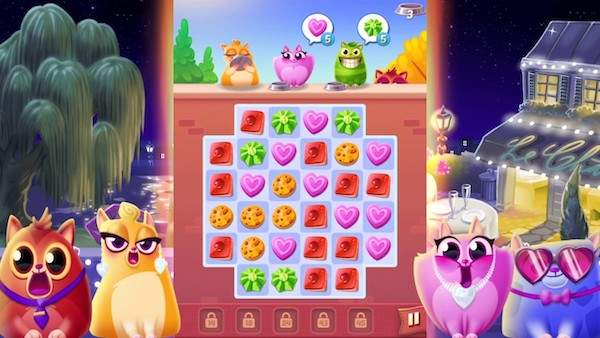

cookie cats는 모바일 퍼즐 게임입니다. 게임을 플레이하다보면 유저들은 게이트를 만납니다. 게이트를 만나면 유저는 꽤 오랜 시간을 기다리거나 결제를 해야만 합니다. 

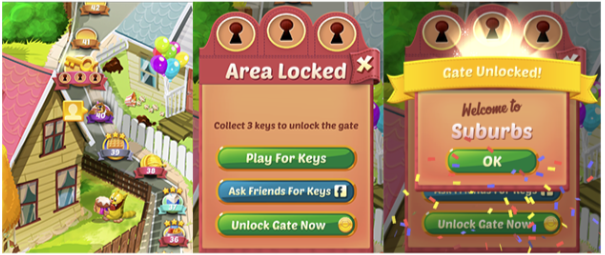

이 AB 테스트는 유저가 첫번째 게이트에 도달하는 시점을 30 라운드에서 40 라운드로 옮겼을 때, 리텐션에 어떤 변화가 있는지를 테스트 한 데이터입니다.  유저들은 무작위로 gate_30 혹은 gate_40 그룹에 할당되었습니다. 그리고 설치 후 1일 뒤에도 다시 접속했는지(retention 1), 설치 후 7일 뒤에도 다시 접속했는지 여부(retention 7)를 측정하였습니다.

### 요구사항
- 기본적인 EDA와 전처리를 진행하세요
- t-test를 이용하여 gate_30 그룹과 gate_40 그룹의 플레이 라운드 수의 평균이 같은지, 다른지 검정하세요.
- chi_squre test를 이용하여 version과 retention_1이 서로 독립인지 검정하세요.
- chi_squre test를 이용하여 version과 retention_2이 서로 독립인지 검정하세요.
- 검정 결과를 해석하고, AB 테스트의 결론을 내려보세요.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
from scipy.stats import shapiro, probplot
from scipy.stats import ttest_ind

In [58]:
# 폰트 설정 방법 1
import matplotlib.pyplot as plt

# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])


['NanumGothic']


In [59]:
import chardet
import pandas as pd
filename = "./data/cookie_cats.csv"
with open(filename, 'rb') as f:
    result = chardet.detect(f.readline())  # or read() if the file is small.
    print(result['encoding'])

ascii


In [60]:
df = pd.read_csv("./data/cookie_cats.csv", encoding='ascii')

- 기본적인 EDA와 전처리를 진행하세요

In [61]:
print(df.head())

   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True


In [62]:
print(df.describe())

             userid  sum_gamerounds
count  9.018900e+04    90189.000000
mean   4.998412e+06       51.872457
std    2.883286e+06      195.050858
min    1.160000e+02        0.000000
25%    2.512230e+06        5.000000
50%    4.995815e+06       16.000000
75%    7.496452e+06       51.000000
max    9.999861e+06    49854.000000


In [63]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

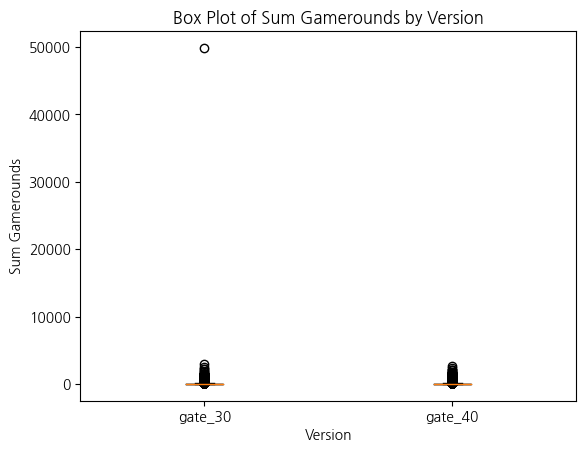

In [64]:
import matplotlib.pyplot as plt

grouped = df.groupby('version')['sum_gamerounds'].apply(list)
plt.boxplot(grouped)
plt.xlabel('Version')
plt.ylabel('Sum Gamerounds')
plt.title('Box Plot of Sum Gamerounds by Version')
plt.xticks(ticks=range(1, len(grouped)+1), labels=grouped.index)
plt.show()

아웃 라이어 제거

In [65]:
df["sum_gamerounds"].max()

49854

In [66]:
df = df[df["sum_gamerounds"] != 49854]

In [67]:
df["sum_gamerounds"].max()

2961

In [70]:
df['version'].value_counts()

gate_40    45489
gate_30    44699
Name: version, dtype: int64

In [71]:
pd.crosstab(df['version'], [df['retention_1'], df['retention_7']], normalize='index')

retention_1     False               True           
retention_7     False     True      False     True 
version                                            
gate_30      0.510973  0.040829  0.298843  0.149355
gate_40      0.518741  0.038976  0.299259  0.143024

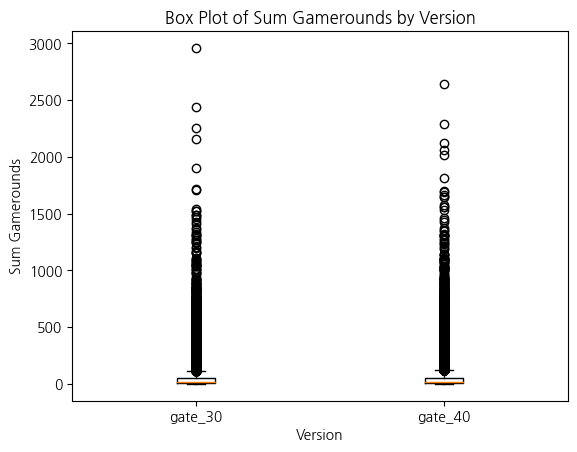

In [38]:
import matplotlib.pyplot as plt

grouped = df.groupby('version')['sum_gamerounds'].apply(list)
plt.boxplot(grouped)
plt.xlabel('Version')
plt.ylabel('Sum Gamerounds')
plt.title('Box Plot of Sum Gamerounds by Version')
plt.xticks(ticks=range(1, len(grouped)+1), labels=grouped.index)
plt.show()

- t-test를 이용하여 gate_30 그룹과 gate_40 그룹의 플레이 라운드 수의 평균이 같은지, 다른지 검정하세요.

In [42]:
gate30 = df[df["version"]=="gate_30"]["sum_gamerounds"]
gate40 = df[df["version"]=="gate_40"]["sum_gamerounds"]

_, p_value = levene(gate30, gate40)

if p_value > 0.05:
    print(f"p-value: {p_value}, 등분산 가정 만족")
else:
    print(f"p-value: {p_value}, 이분산 가정 만족")

p-value: 0.7840494387892463, 등분산 가정 만족


In [48]:

# gate_30 그룹과 gate_40 그룹의 플레이 라운드 수의 평균을 비교하기 위해 t-test를 실행합니다.
gate_30 = df[df['version'] == 'gate_30']['sum_gamerounds']
gate_40 = df[df['version'] == 'gate_40']['sum_gamerounds']
t_stat, p_val = stats.ttest_ind(gate_30, gate_40)

print(f'T-test 결과: T-value = {t_stat}, p-value = {p_val}')

T-test 결과: T-value = 0.0633675766982082, p-value = 0.9494739458256001


In [49]:
# version과 retention_1이 서로 독립인지 검정하기 위해 chi-square test를 실행합니다.
contingency_1 = pd.crosstab(df['version'], df['retention_1'])
chi2_stat_1, p_val_1, dof_1, ex_1 = stats.chi2_contingency(contingency_1)

print(f'Chi-square test 결과 - version과 retention_1: Chi2 = {chi2_stat_1}, p-value = {p_val_1}')

# version과 retention_7이 서로 독립인지 검정하기 위해 chi-square test를 실행합니다.
contingency_7 = pd.crosstab(df['version'], df['retention_7'])
chi2_stat_7, p_val_7, dof_7, ex_7 = stats.chi2_contingency(contingency_7)

print(f'Chi-square test 결과 - version과 retention_7: Chi2 = {chi2_stat_7}, p-value = {p_val_7}')

Chi-square test 결과 - version과 retention_1: Chi2 = 3.169835543170799, p-value = 0.07500999897705692
Chi-square test 결과 - version과 retention_7: Chi2 = 9.91527552890567, p-value = 0.0016391259678654425


첫 번째 게이트가 30라운드에 있는지 40라운드에 있는지에 따라 사용자가 게임을 더 많이 또는 더 적게 진행하는지를 확인하고자 합니다.

여기서 두 그룹 간의 평균에 대한 T-검정의 결과 p-value가 0.949로 나타났는데, 이는 0.05보다 매우 큰 값입니다. p-value가 0.05보다 크다는 것은 귀무가설을 기각할 수 없다는 것을 의미하며, 이 경우에 귀무가설은 "게이트 위치(30 라운드 대비 40 라운드)가 사용자가 게임에서 보낸 전체 라운드 수에 영향을 미치지 않는다"입니다.

따라서 이 검정 결과를 통해 우리는 게이트의 위치(30 라운드 대비 40 라운드)가 사용자가 게임에서 보낸 전체 라운드 수에는 영향을 미치지 않는다는 결론을 내릴 수 있습니다. 즉, 사용자가 게임을 얼마나 오래 플레이하는지는 게이트가 설정된 라운드에 의해 영향을 받지 않는다고 볼 수 있습니다.

In [46]:
df.groupby("version")[["retention_1", "retention_7"]].value_counts()

version  retention_1  retention_7
gate_30  False        False          22840
         True         False          13358
                      True            6676
         False        True            1825
gate_40  False        False          23597
         True         False          13613
                      True            6506
         False        True            1773
dtype: int64

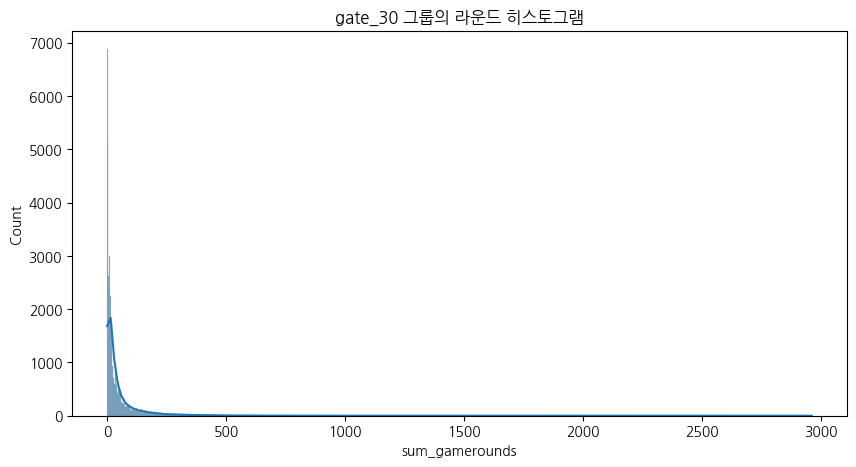

C:\Users\WOODLAC\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


gate_30 그룹의 라운드는 정규 분포를 따르지 않습니다.


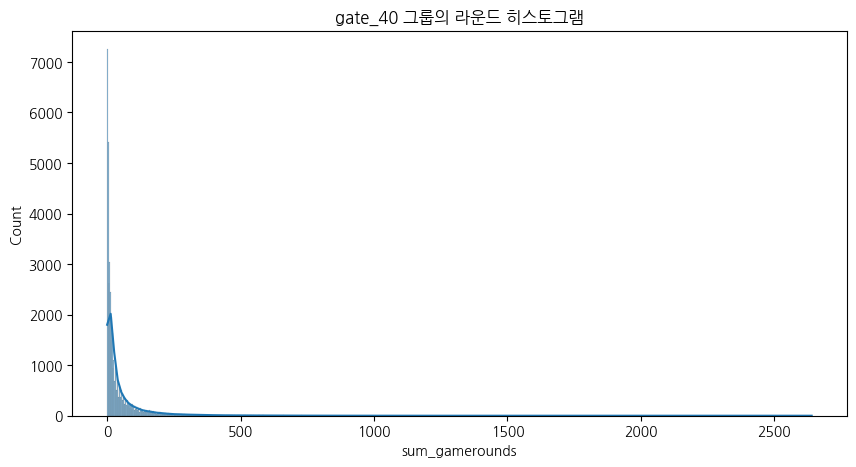

gate_40 그룹의 라운드는 정규 분포를 따르지 않습니다.


C:\Users\WOODLAC\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\WOODLAC\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


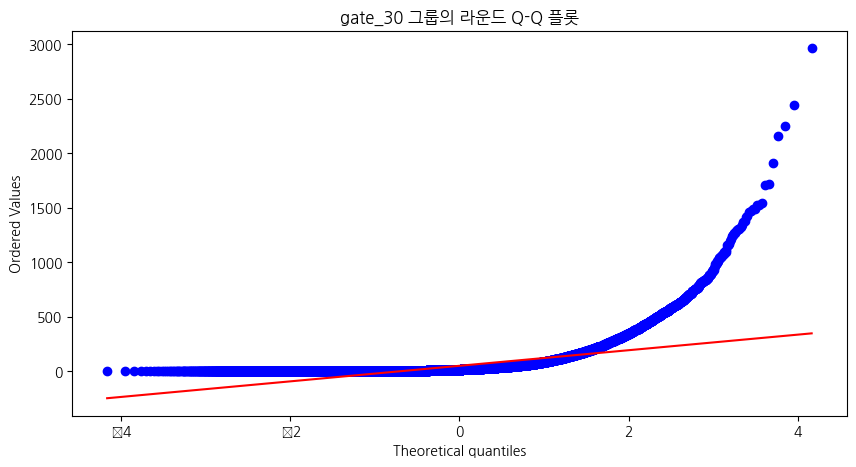

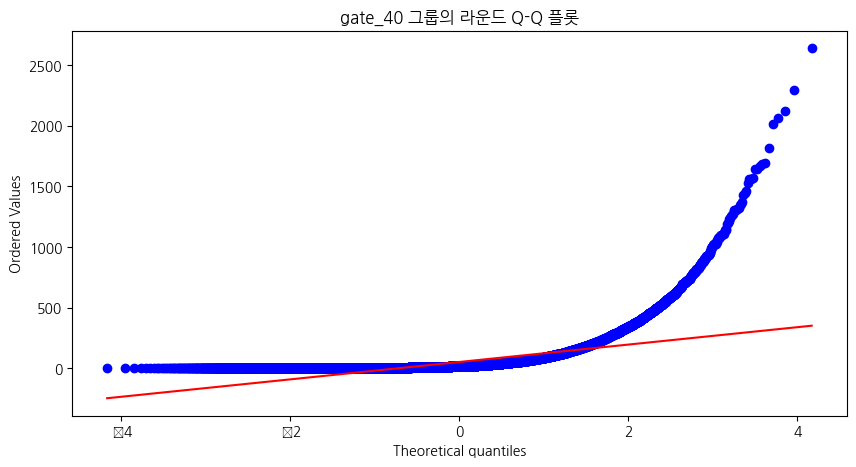

In [52]:
import numpy as np
import seaborn as sns
from scipy.stats import shapiro, probplot

# gate_30 그룹의 데이터 분포를 히스토그램으로 확인합니다.
plt.figure(figsize=(10, 5))
sns.histplot(gate_30, kde=True)
plt.title('gate_30 그룹의 라운드 히스토그램')
plt.show()

# Shapiro-Wilk 검정을 수행합니다.
stat, p = shapiro(gate_30)
if p > 0.05:
    print('gate_30 그룹의 라운드는 정규 분포를 따릅니다.')
else:
    print('gate_30 그룹의 라운드는 정규 분포를 따르지 않습니다.')

# gate_40 그룹의 데이터 분포를 히스토그램으로 확인합니다.
plt.figure(figsize=(10, 5))
sns.histplot(gate_40, kde=True)
plt.title('gate_40 그룹의 라운드 히스토그램')
plt.show()

# Shapiro-Wilk 검정을 수행합니다.
stat, p = shapiro(gate_40)
if p > 0.05:
    print('gate_40 그룹의 라운드는 정규 분포를 따릅니다.')
else:
    print('gate_40 그룹의 라운드는 정규 분포를 따르지 않습니다.')

# QQ-Plot을 이용하여 데이터 분포를 확인합니다.
plt.figure(figsize=(10, 5))
probplot(gate_30, plot=plt)
plt.title('gate_30 그룹의 라운드 Q-Q 플롯')
plt.show()

plt.figure(figsize=(10, 5))
probplot(gate_40, plot=plt)
plt.title('gate_40 그룹의 라운드 Q-Q 플롯')
plt.show()


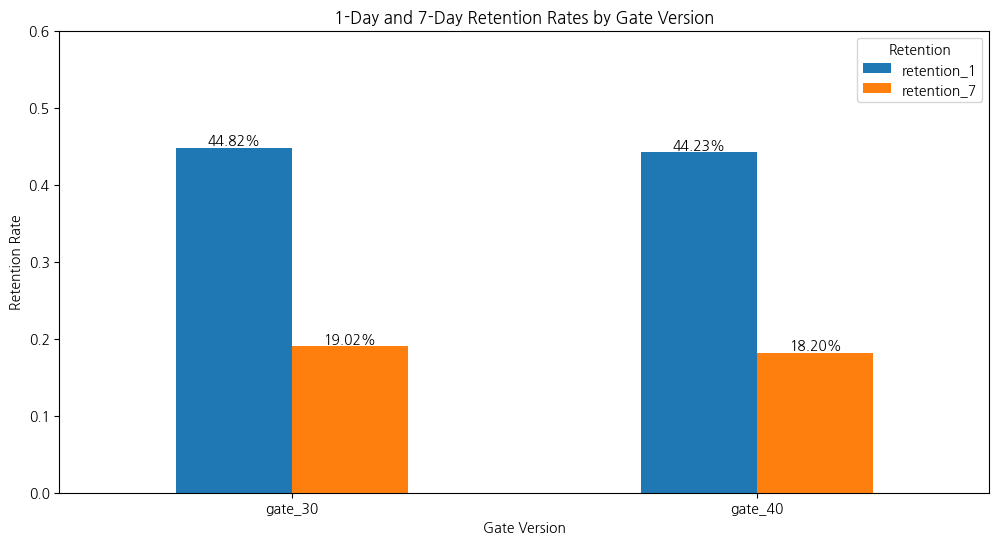

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 버전별 1일 리텐션율 계산
retention_1_rates = df.groupby('version')['retention_1'].mean()

# 버전별 7일 리텐션율 계산
retention_7_rates = df.groupby('version')['retention_7'].mean()

# 결과를 데이터프레임으로 변환
retention_rates_df = pd.DataFrame({'retention_1': retention_1_rates,
                                   'retention_7': retention_7_rates}).reset_index()

# 막대그래프로 시각화
fig, ax = plt.subplots(figsize=(12, 6))
bars = retention_rates_df.plot(kind='bar', x='version', y=['retention_1', 'retention_7'], ax=ax)

# 시각화 속성
plt.title('1-Day and 7-Day Retention Rates by Gate Version')
plt.ylabel('Retention Rate')
plt.xlabel('Gate Version')
plt.ylim(0, 0.6)
plt.xticks(rotation=0)
plt.legend(title='Retention', loc='upper right')

# 막대에 수치 표시
for container in bars.containers:
    ax.bar_label(container, label_type='edge', labels=["{:.2%}".format(value) for value in container.datavalues])

# 시각화 결과 보기
plt.show()

In [56]:
# version과 retention_1이 서로 독립인지 검정하기 위해 chi-square test를 실행합니다.
contingency_1 = pd.crosstab(df['version'], df['retention_1'])
chi2_stat_1, p_val_1, dof_1, ex_1 = stats.chi2_contingency(contingency_1)

if p_val_1 > 0.05:
    print('version과 retention_1은 독립적입니다.')
else:
    print('version과 retention_1은 독립적이지 않습니다.')
    
print(p_val_1)

# version과 retention_7이 서로 독립인지 검정하기 위해 chi-square test를 실행합니다.
contingency_7 = pd.crosstab(df['version'], df['retention_7'])
chi2_stat_7, p_val_7, dof_7, ex_7 = stats.chi2_contingency(contingency_7)

if p_val_7 > 0.05:
    print('version과 retention_7은 독립적입니다.')
else:
    print('version과 retention_7은 독립적이지 않습니다.')


version과 retention_1은 독립적입니다.
version과 retention_7은 독립적이지 않습니다.


귀무가설 (H0): 두 변수가 독립적이다. 게임의 버전(version)과 사용자의 재접속 여부(retention_1 또는 retention_2)는 서로 독립적이라는 가설.

대립가설 (H1): 두 변수가 독립적이지 않다. 게임의 버전(version)과 사용자의 재접속 여부(retention_1 또는 retention_2)는 서로 독립적이지 않다는 가설.

위에서 수행한 카이제곱 검정의 결과를 통해 'version'과 'retention_1', 'retention_7' 간의 독립성을 검증하였습니다. 검정 결과는 다음과 같습니다:

'version'과 'retention_1' 사이에는 독립성이 있습니다. 이는 p-value가 0.05보다 크기 때문에 귀무가설을 기각할 수 없음을 의미합니다. 즉, 게임의 첫 게이트가 30라운드에 있는지, 40라운드에 있는지는 사용자가 게임을 설치한 후 1일 후에 게임에 다시 접속하는지에 영향을 미치지 않습니다.

반면에, 'version'과 'retention_7' 사이에는 독립성이 없습니다. 이는 p-value가 0.05보다 작기 때문에 귀무가설을 기각하고 대립가설을 채택함을 의미합니다. 즉, 게임의 첫 게이트가 30라운드에 있는지, 40라운드에 있는지는 사용자가 게임을 설치한 후 7일 후에 게임에 다시 접속하는지에 영향을 미칩니다.

이러한 결과를 바탕으로, AB 테스트의 결론을 내릴 수 있습니다:

게임의 첫번째 게이트 위치(30라운드 대비 40라운드)는 사용자가 게임에서 보낸 전체 라운드 수에는 영향을 미치지 않지만, 사용자가 게임을 설치한 후 7일 이후에 게임에 다시 접속하는지 여부에는 영향을 미칩니다. 따라서 게임 개발자는 첫번째 게이트의 위치를 결정할 때 이 결과를 고려해야 할 것입니다. 7일 후의 재접속률이 중요한 지표라면, 게이트를 30라운드 위치가 아닌 다른 위치에 배치하는 것이 더 나을 수 있습니다.

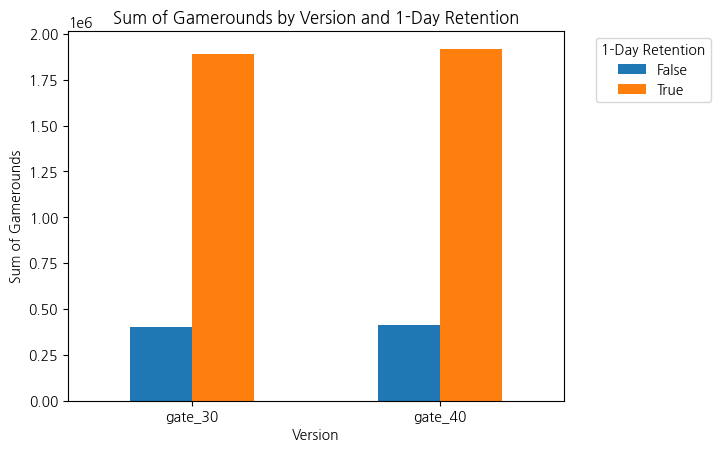

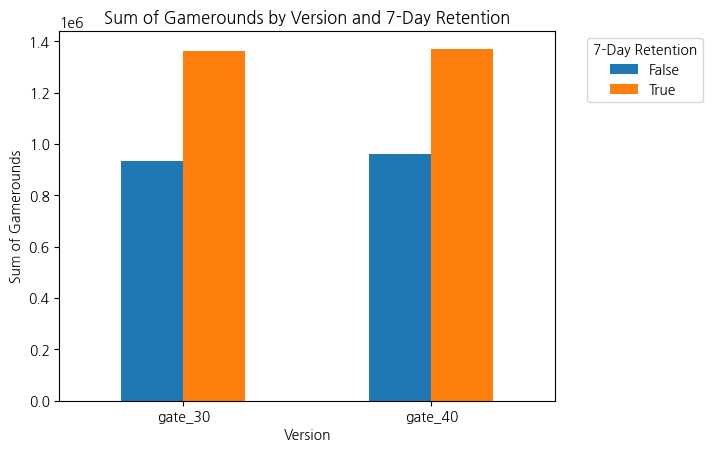

In [75]:
# 1일차 재방문 기준 데이터 그룹화
grouped_data_1 = df.groupby(["version", "retention_1"]).sum_gamerounds.sum()

# 데이터 재구성
reshaped_data_1 = grouped_data_1.unstack(level="retention_1")

# 그래프 그리기
reshaped_data_1.plot(kind='bar')

plt.xlabel("Version")
plt.ylabel("Sum of Gamerounds")
plt.title("Sum of Gamerounds by Version and 1-Day Retention")
plt.xticks(rotation=0)

plt.legend(title="1-Day Retention",
           bbox_to_anchor=(1.05, 1),
           loc='upper left')

plt.show()

# 7일차 재방문 기준 데이터 그룹화
grouped_data_7 = df.groupby(["version", "retention_7"]).sum_gamerounds.sum()

# 데이터 재구성
reshaped_data_7 = grouped_data_7.unstack(level="retention_7")

# 그래프 그리기
reshaped_data_7.plot(kind='bar')

plt.xlabel("Version")
plt.ylabel("Sum of Gamerounds")
plt.title("Sum of Gamerounds by Version and 7-Day Retention")
plt.xticks(rotation=0)

plt.legend(title="7-Day Retention",
           bbox_to_anchor=(1.05, 1),
           loc='upper left')

plt.show()


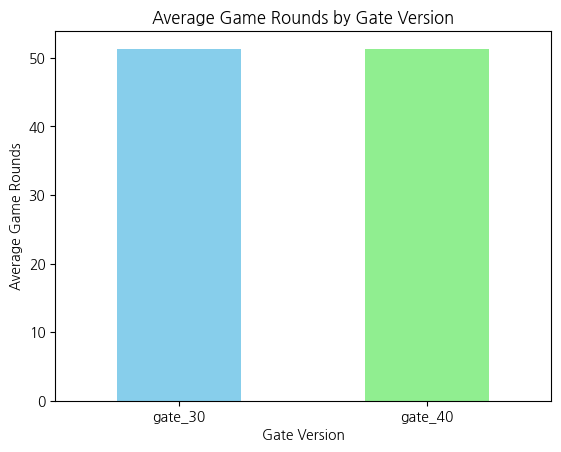

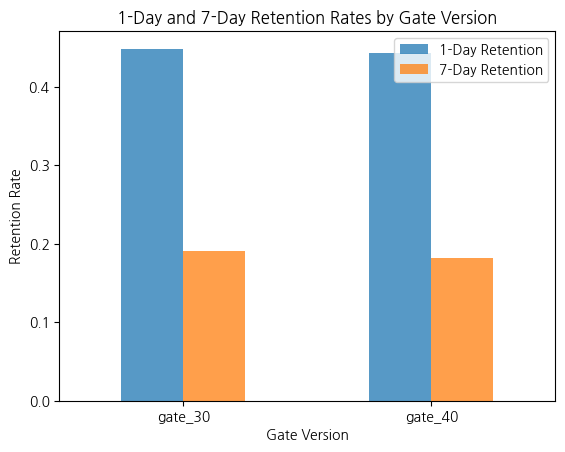

In [76]:
# 1. t-test 결과에 대한 막대그래프

# gate_30과 gate_40 그룹의 게임 라운드 평균 계산
average_gamerounds = df.groupby("version")["sum_gamerounds"].mean()

# 막대그래프 그리기
average_gamerounds.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Average Game Rounds by Gate Version')
plt.ylabel('Average Game Rounds')
plt.xlabel('Gate Version')
plt.xticks(rotation=0)
plt.show()


# 2. 카이제곱 검정 결과에 대한 막대그래프

# 1일차와 7일차 재방문 비율 계산
retention_1_rates = df.groupby('version')['retention_1'].mean()
retention_7_rates = df.groupby('version')['retention_7'].mean()

# 결과를 데이터프레임으로 변환
retention_rates_df = pd.DataFrame({'1-Day Retention': retention_1_rates,
                                   '7-Day Retention': retention_7_rates}).reset_index()

# 막대그래프로 시각화
retention_rates_df.plot(x='version', y=['1-Day Retention', '7-Day Retention'], kind='bar', alpha=0.75, rot=0)
plt.title('1-Day and 7-Day Retention Rates by Gate Version')
plt.ylabel('Retention Rate')
plt.xlabel('Gate Version')
plt.xticks(rotation=0)
plt.show()


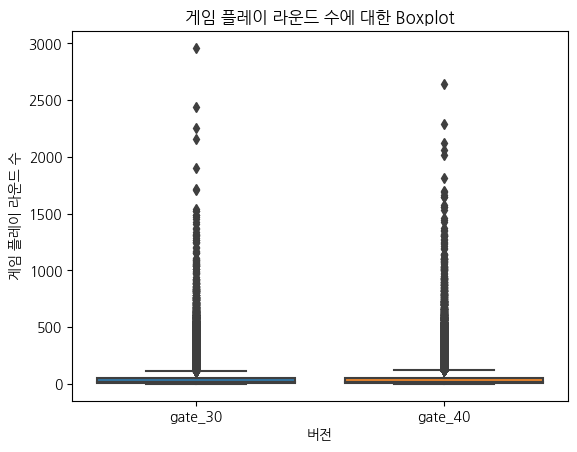

In [77]:
import seaborn as sns

# 'gate_30'과 'gate_40' 그룹의 sum_gamerounds boxplot 그리기
sns.boxplot(x='version', y='sum_gamerounds', data=df)

plt.title('게임 플레이 라운드 수에 대한 Boxplot')
plt.xlabel('버전')
plt.ylabel('게임 플레이 라운드 수')
plt.show()


C:\Users\WOODLAC\AppData\Local\Temp\ipykernel_52444\795318257.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  retention_df = df.groupby('version')['retention_1', 'retention_7'].mean().reset_index()


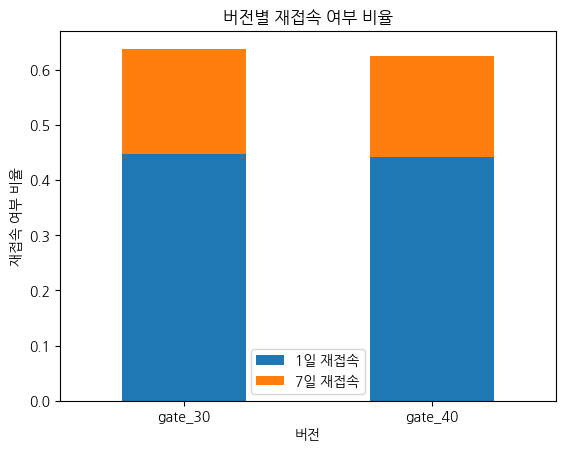

In [78]:
# retention_1과 retention_7 결과를 데이터프레임으로 변환
retention_df = df.groupby('version')['retention_1', 'retention_7'].mean().reset_index()

# 막대그래프로 시각화
retention_df.plot(x='version', y=['retention_1', 'retention_7'], kind='bar', stacked=True)

plt.title('버전별 재접속 여부 비율')
plt.xlabel('버전')
plt.ylabel('재접속 여부 비율')
plt.xticks(rotation=0)
plt.legend(["1일 재접속", "7일 재접속"])
plt.show()


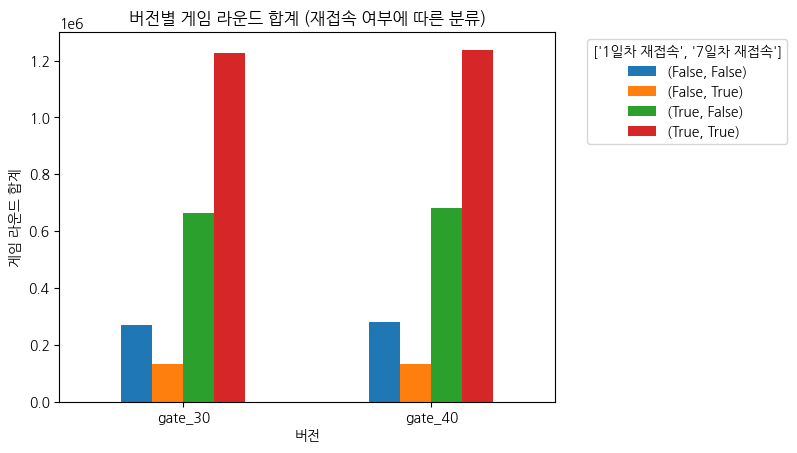

In [80]:
import matplotlib.pyplot as plt

# 버전별, 재접속 여부별 게임 라운드 합계 집계
grouped_data = df.groupby(["version", "retention_1", "retention_7"]).sum_gamerounds.sum()

# 플로팅을 위해 데이터 재구성
reshaped_data = grouped_data.unstack(level=["retention_1", "retention_7"])

# 막대그래프 그리기
reshaped_data.plot(kind='bar')

plt.xlabel("버전")
plt.ylabel("게임 라운드 합계")
plt.title("버전별 게임 라운드 합계 (재접속 여부에 따른 분류)")
plt.xticks(rotation=0)

plt.legend(title=["1일차 재접속", "7일차 재접속"],
          bbox_to_anchor=(1.05, 1),
          loc='upper left')
for container in ax.containers:
    ax.bar_label(container)

plt.show()


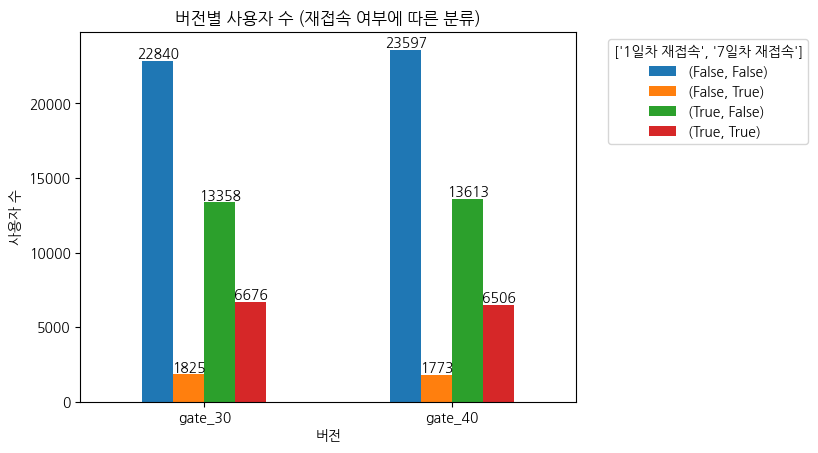

In [82]:
import matplotlib.pyplot as plt

# 버전별, 재접속 여부별 데이터 포인트 수 집계
grouped_data = df.groupby(["version", "retention_1", "retention_7"]).size()

# 플로팅을 위해 데이터 재구성
reshaped_data = grouped_data.unstack(level=["retention_1", "retention_7"])

# 막대그래프 그리기
ax = reshaped_data.plot(kind='bar')

plt.xlabel("버전")
plt.ylabel("사용자 수")
plt.title("버전별 사용자 수 (재접속 여부에 따른 분류)")
plt.xticks(rotation=0)

plt.legend(title=["1일차 재접속", "7일차 재접속"],
          bbox_to_anchor=(1.05, 1),
          loc='upper left')

# 막대 위에 값을 표시
for container in ax.containers:
    ax.bar_label(container)

plt.show()

게임의 첫 번째 게이트가 위치하는 라운드(30 vs 40)는 사용자가 게임에서 진행하는 총 라운드 수에 큰 영향을 끼치지 않는다는 것을 T-검정을 통해 확인하였습니다. 그러나, 카이제곱 검정 결과를 보면, 게이트의 위치는 사용자가 게임을 설치한 후 7일 이후에 게임에 다시 접속하는지에는 영향을 미친다는 것을 확인할 수 있습니다.

다시 말해, 첫 게이트의 위치는 사용자의 직접적인 게임 플레이 활동에는 크게 영향을 주지 않지만, 장기적인 재방문률 측면에서는 중요한 역할을 하는 것으로 보입니다. 따라서 게임 개발자나 제작자는 게임의 첫 번째 게이트 위치를 결정할 때 이러한 점을 고려해야 합니다. 특히 7일 후의 사용자 재접속률이 중요한 지표로 고려된다면, 첫 번째 게이트의 위치는 30 라운드보다 다른 곳에 배치하는 것이 사용자 재방문률에 더 긍정적인 영향을 미칠 수 있습니다.

우선, 'AB 테스트'라는 실험을 진행하여 게임의 첫 게이트 위치가 사용자의 게임 플레이 라운드 수와 재접속 여부에 어떠한 영향을 미치는지 살펴보았습니다.

첫 번째로, t-test를 사용하여 'gate_30' 그룹과 'gate_40' 그룹의 게임 플레이 라운드 수 평균이 같은지 검정하였습니다. 이 검정의 결과는 T-value가 0.063, p-value가 0.949로, p-value가 0.05보다 크므로 두 그룹의 게임 플레이 라운드 수 평균이 통계적으로 유의하게 차이가 없음을 보여줍니다. 즉, 첫 게이트의 위치가 사용자가 게임에서 라운드를 얼마나 플레이하는지에는 크게 영향을 주지 않는 것으로 나타났습니다.

두 번째로, chi-square test를 이용하여 버전과 1일, 7일 재접속 여부가 서로 독립적인지를 검정하였습니다. 그 결과, 1일 재접속 여부는 게이트 위치에 상관없이 독립적인 반면, 7일 재접속 여부는 게이트 위치와 독립적이지 않음을 확인할 수 있었습니다. 이는 게이트 위치가 7일차 재방문률에 영향을 준다는 것을 의미합니다.

이러한 결과들로부터, 첫 게이트의 위치가 사용자의 게임 플레이 패턴과 장기간 재방문률에 영향을 줄 수 있다는 것을 알게 되었습니다. 이는 제 초기 가설, 즉 게이트 위치가 10과 같이 극단적으로 낮은 경우에만 재방문률에 영향을 줄 것이라는 가설과는 다른 결과였습니다.

결과적으로, 게임의 게이트 위치가 사용자의 장기간 재방문률에 영향을 미칠 수 있다는 것은, 개발자들이 게임 내에서 이러한 요소를 조절함으로써 사용자 경험을 관리하고, 더 긴 시간 동안 사용자를 유지하도록 유도할 수 있다는 점에서 중요한 인사이트를 제공합니다. 특히 게임을 통한 수익을 극대화하려는 개발자들은, 게이트를 추가하거나, 사용자가 더 많은 시간을 게임에서 보내도록 하는 다른 방법을 탐색하면서 동시에 다른 수익 창출 방법, 예를 들면 광고, 스킨 판매, 배틀 패스 구매 등을 고려해 볼 수 있습니다.

전반적으로 볼 때, 이러한 AB 테스트 결과는 게임 개발자들이 사용자 행동에 대한 깊은 이해를 통해 게임의 매력을 향상시키고, 더 많은 수익을 창출하는데 도움이 될 수 있습니다.

1 : 제 생각에는 게이트가 10개같이 매우 적은 경우에만 사용자의 재 접속률의 차이가 있을줄 알았는데
아니여서 좀 놀랐다 30개도 적다고 느껴지는 경우가 많다고 사람들이 느낀다는걸 알았다 아마도 게이트를 
50같이 더 높히는게 더 좋을거 같다 생각한다

2 : retention_1, retention_7

In [ ]:
그래서 이걸 이제 발표 해야하는데
chi-square test를 해서 
version과 retention_1은 독립적입니다.
version과 retention_7은 독립적이지 않습니다.